# Functional annotation of differentially expressed elements using Blast2GO.

## Prerequisite:
* **diffexpanalysis** module
* List(s) of up-regulated and down-regulated proteins from comparison studies
* A list of all of the proteins/genes in your dataset

## Purpose:
Here, we show that user how to annotate your differentially expressed elemetns with GO terms (to learn more, go to http://geneontology.org/) and discover what pathways or compartmentalization are affected through experimental conditions. 

**Blast2GO** is an open-source program that will gather the appropiate gene ontologies from the protein/DNA sequences for your protein(s)/gene(s) of interest. For more information and basic instructions, please refer to: https://www.blast2go.com/. **Currently, there are no open-source software available for functionally annotating metabolomics dataset.** 

For **Step 1 - Step 3**, this is only if the user doesn't have the the complete, annotated b2g files for all the proteins of interest. Our lab has the complete, annotated .b2g files for *Azosprillum brasilense strain SP7* and *Escherichia coli K12*.

Due to GITHUB size limit, please email Lam Vo: lvo5@vols.utk.edu and/or Gladys Alexandre: galexan2@utk.edu for the files.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###############################
# This package below is for viewing purpose: not required for this module
from IPython.display import Image

### Step 1: Gathering the .fasta files that contain all the sequences from proteomics analyses

First, we need to gather all of the accession numbers and use the UniPROT search engine (https://www.uniprot.org/uploadlists/) to find the .fasta file to download. 

In [22]:
# Gathering the accession numbers to copy to the UniPROT search engine:
data = pd.read_excel('A4 and A1A4 raw data.xlsx')
for i in data['UniProtID']:
    print(i)

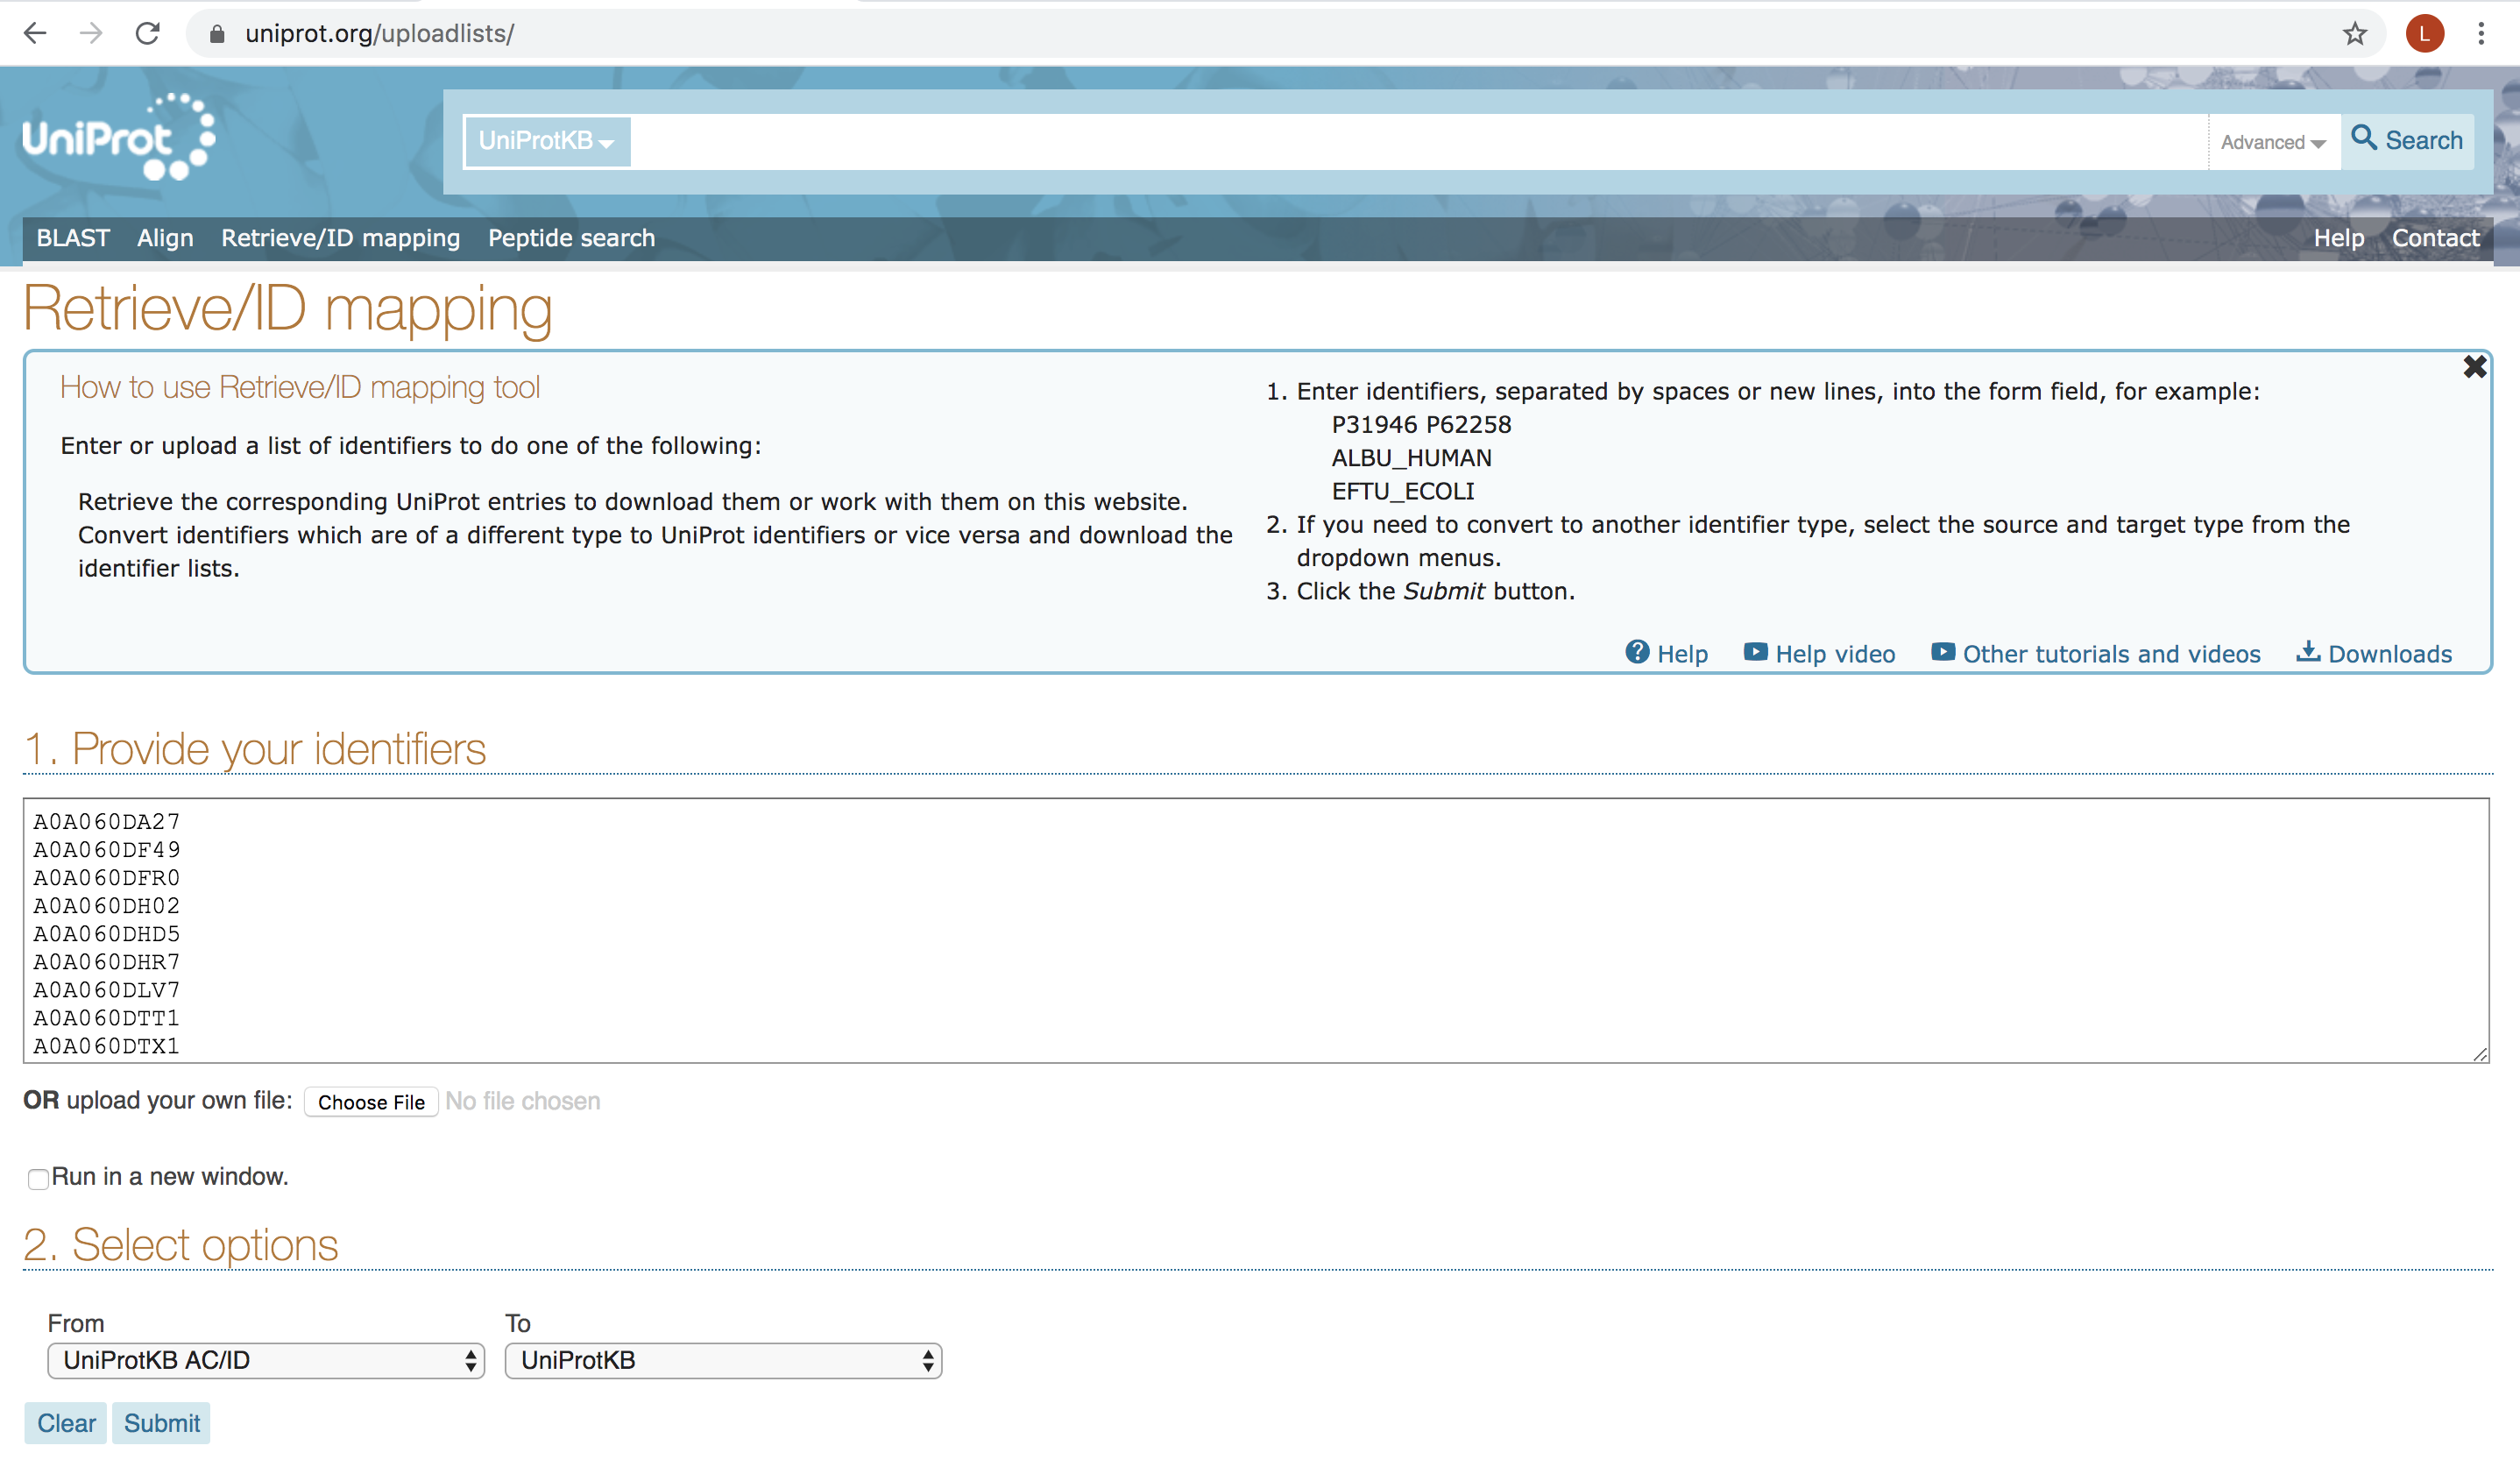

In [19]:
Image("pictures/1.png")

From here, you can click **'Submit'**. You can have the option of changing your inputs type in the **'Select options'** at the **'From'** markdown. This will be solely dependent on the IDs types that the mass spectometry results yield.

Once you click submit, it will show you this page. 

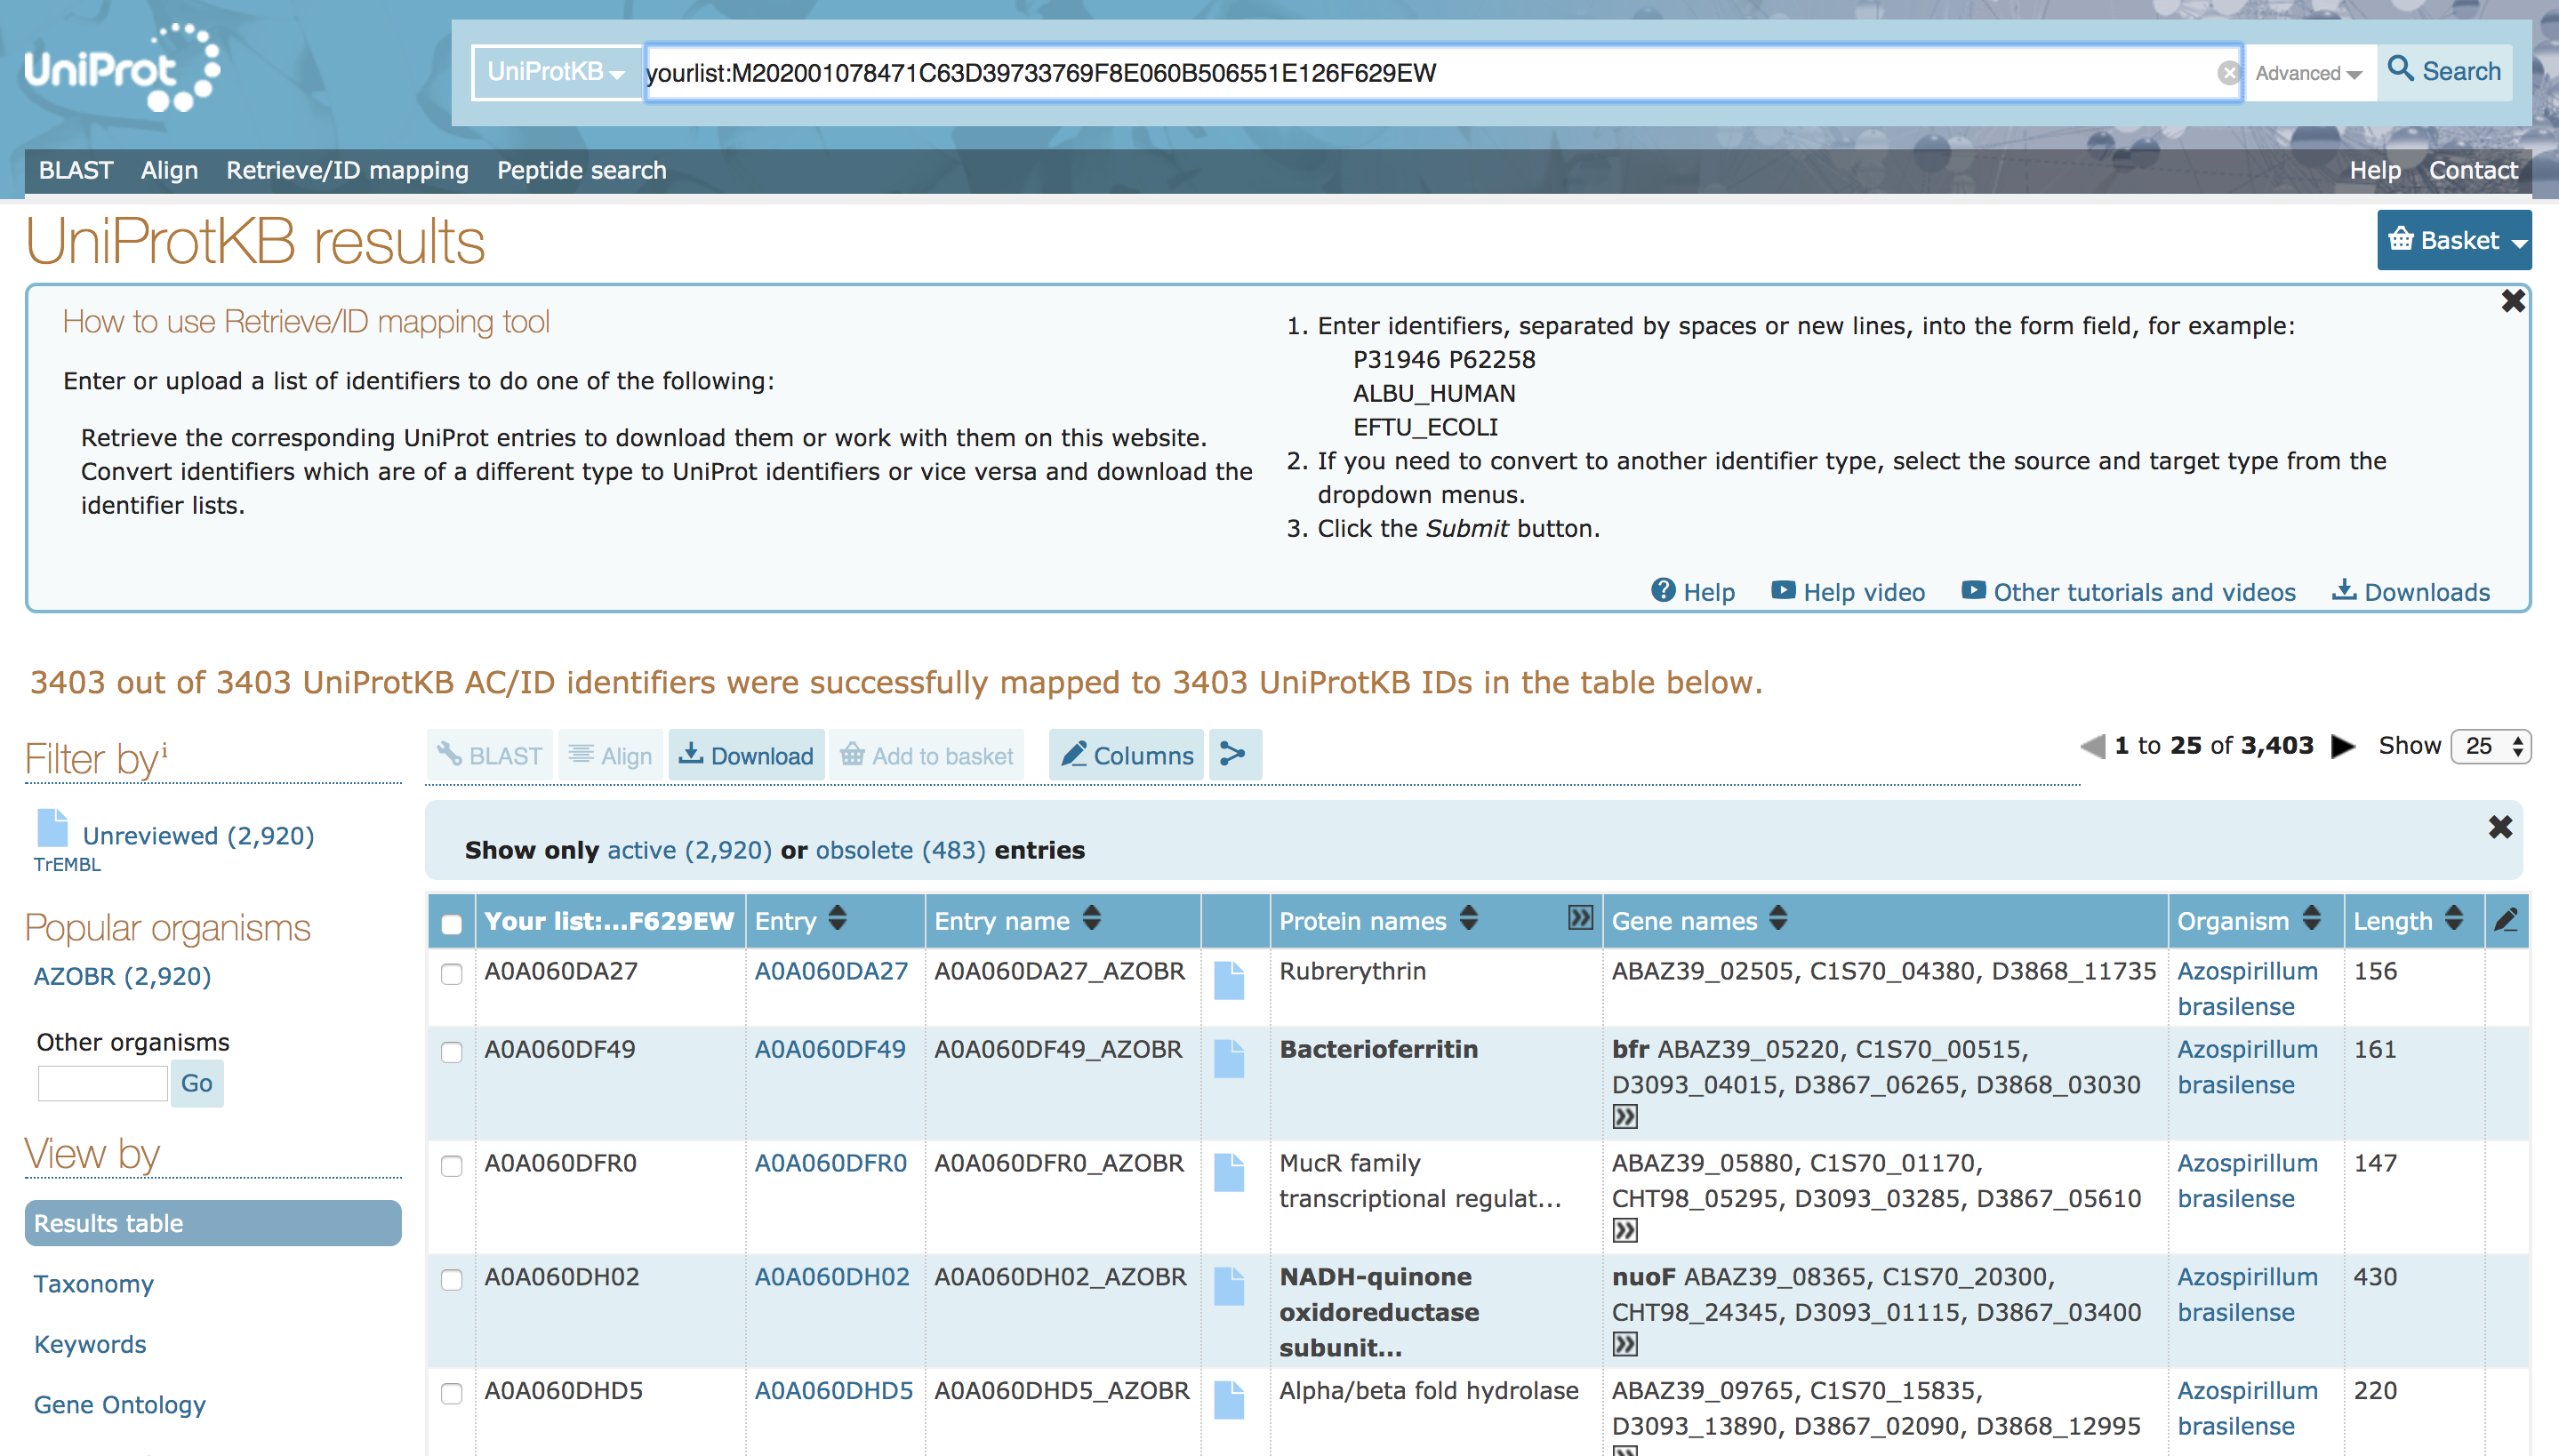

In [20]:
Image("pictures/2.png")

You can then download the .fasta file of all of the proteins detected in the MS analyses by pressing **'Download'**. Make sure you are downloading the canonical file.

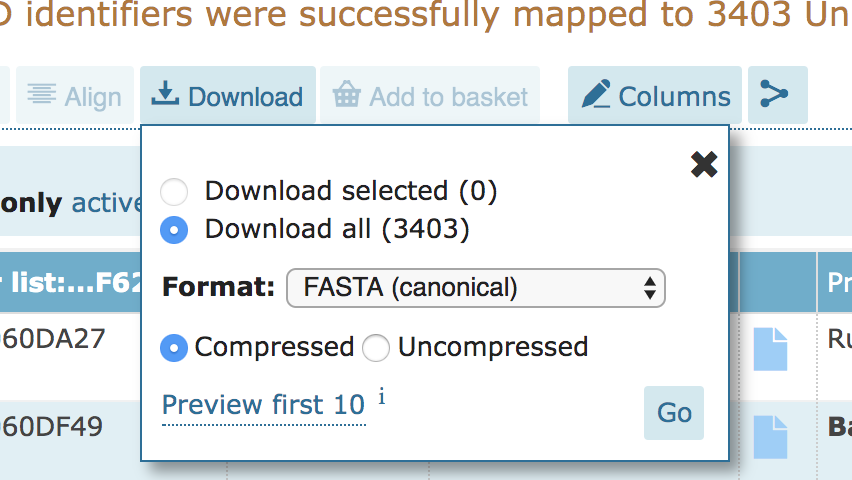

In [21]:
Image("pictures/3.png")

### Step 2: Inputing the .fasta files that contain all the sequences into Blast2GO.

Once you download the file, you can **open** the fasta file you download in Blast2GO. You have to unzip the downloaded file first. Then, you can open the file in Blast2GO by dragging the .fasta file into the Blast2GO interface. 

After that, this is what you will see. Notice the diagram at the bottom. You can see that this will be the general workflow of BLAST2Go.

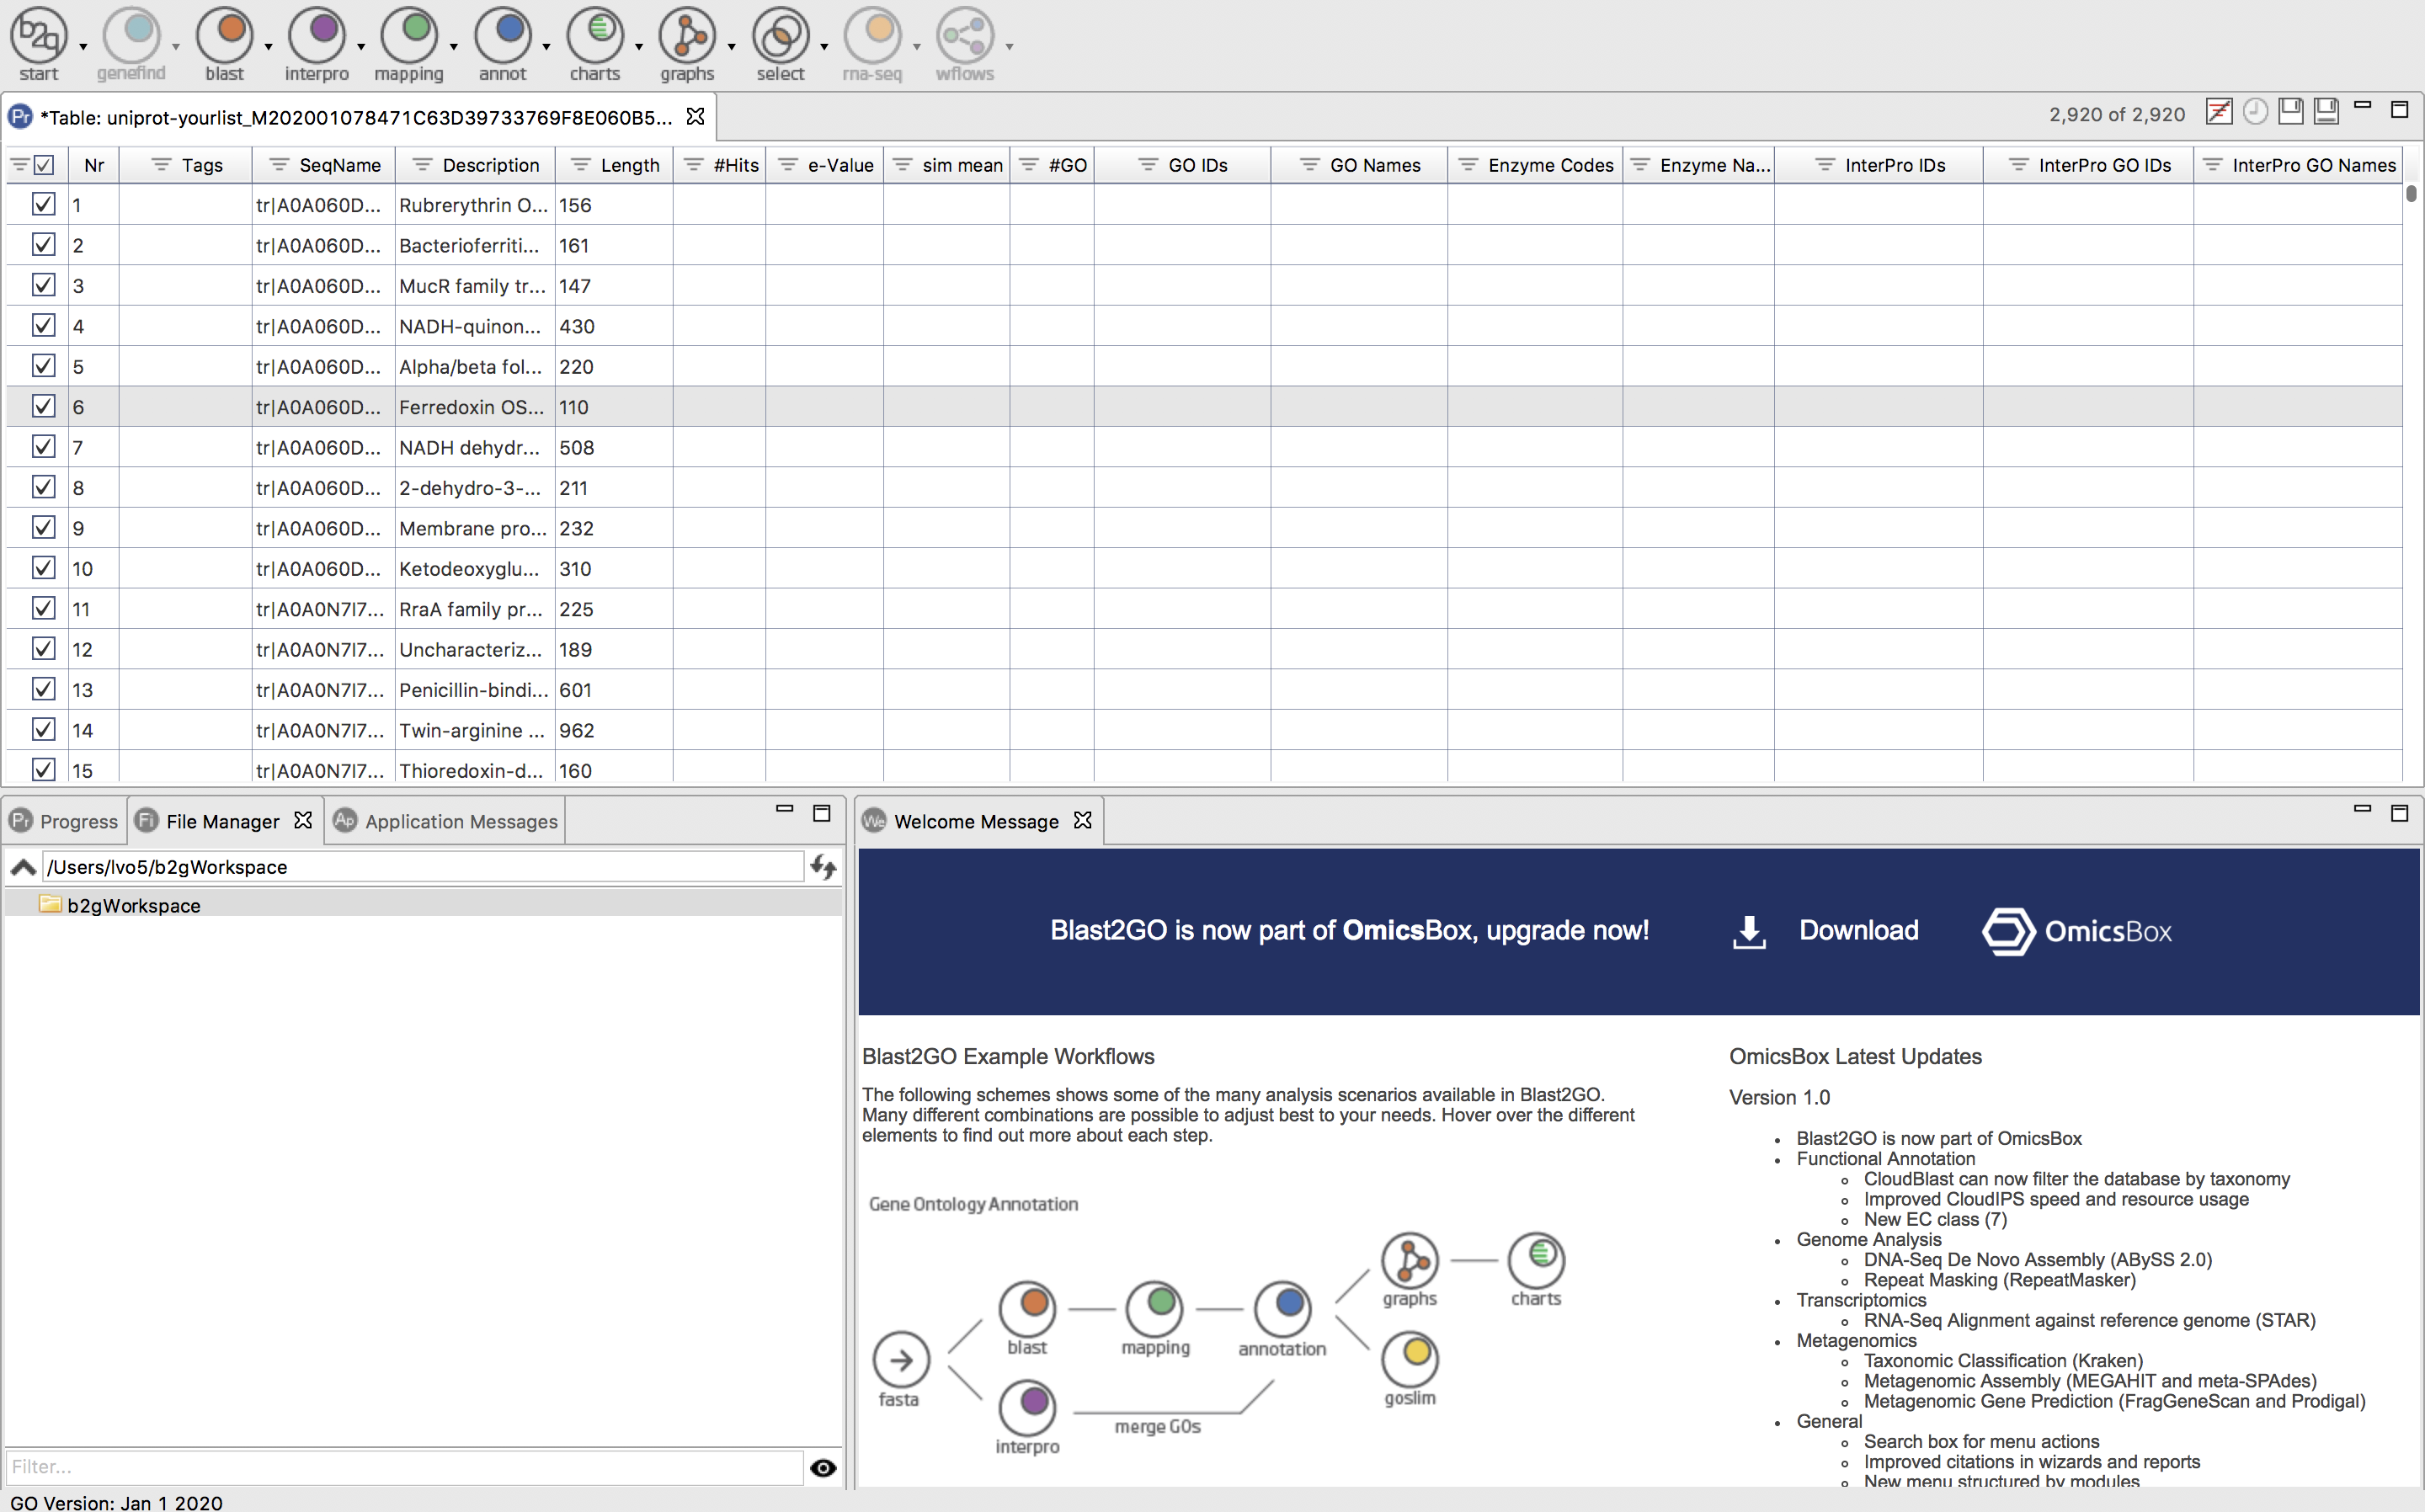

In [23]:
Image("pictures/4.png")

### Step 3: blast - interpro - mapping - annotation workflow for all of your omnics

First, you have to run the **BLAST** option for your omnics dataset. Generally, the default setting for running BLAST should be sufficent. 

Once you click BLAST, you will have this screen.

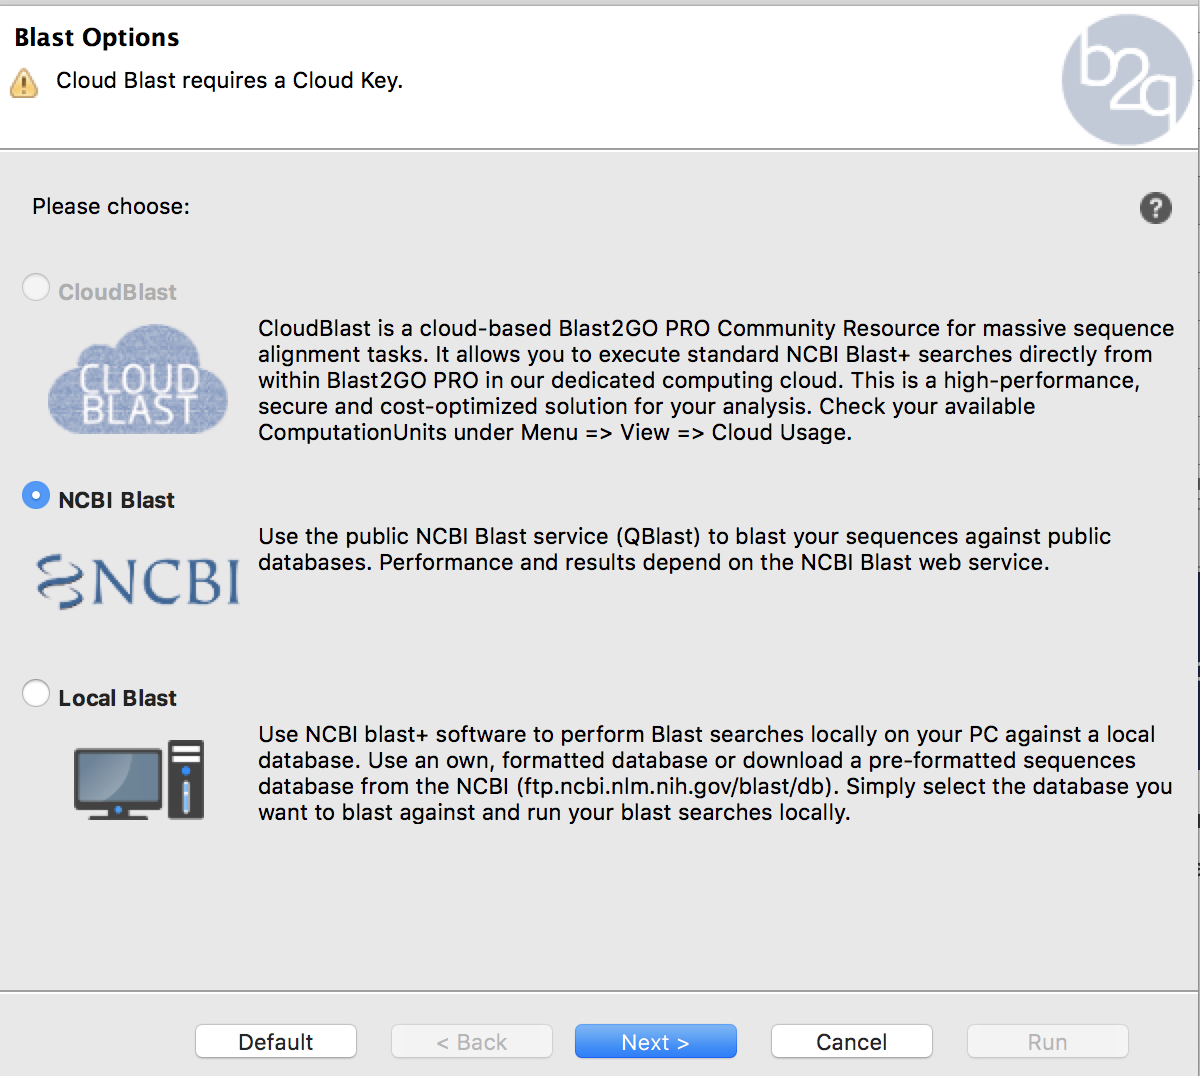

In [24]:
Image("pictures/5.png")

The BLAST-ing process for more than 2000-3000 proteins/genes sequences is **VERY, VERY computationally laborious and requires ernomous processing power to perform quickly**. If your lab is able to afford CloudBLAST from the **PRO** packages, the BLAST process will take less than a day. The **BASIC** package will do the same job but with longer timing. In our experience, BLAST-ting ~3000 proteins will take **1-2 months**. 

We used the following options for BLAST-ing to minimize running time. When the program is running, the computer has to be on at all times. 

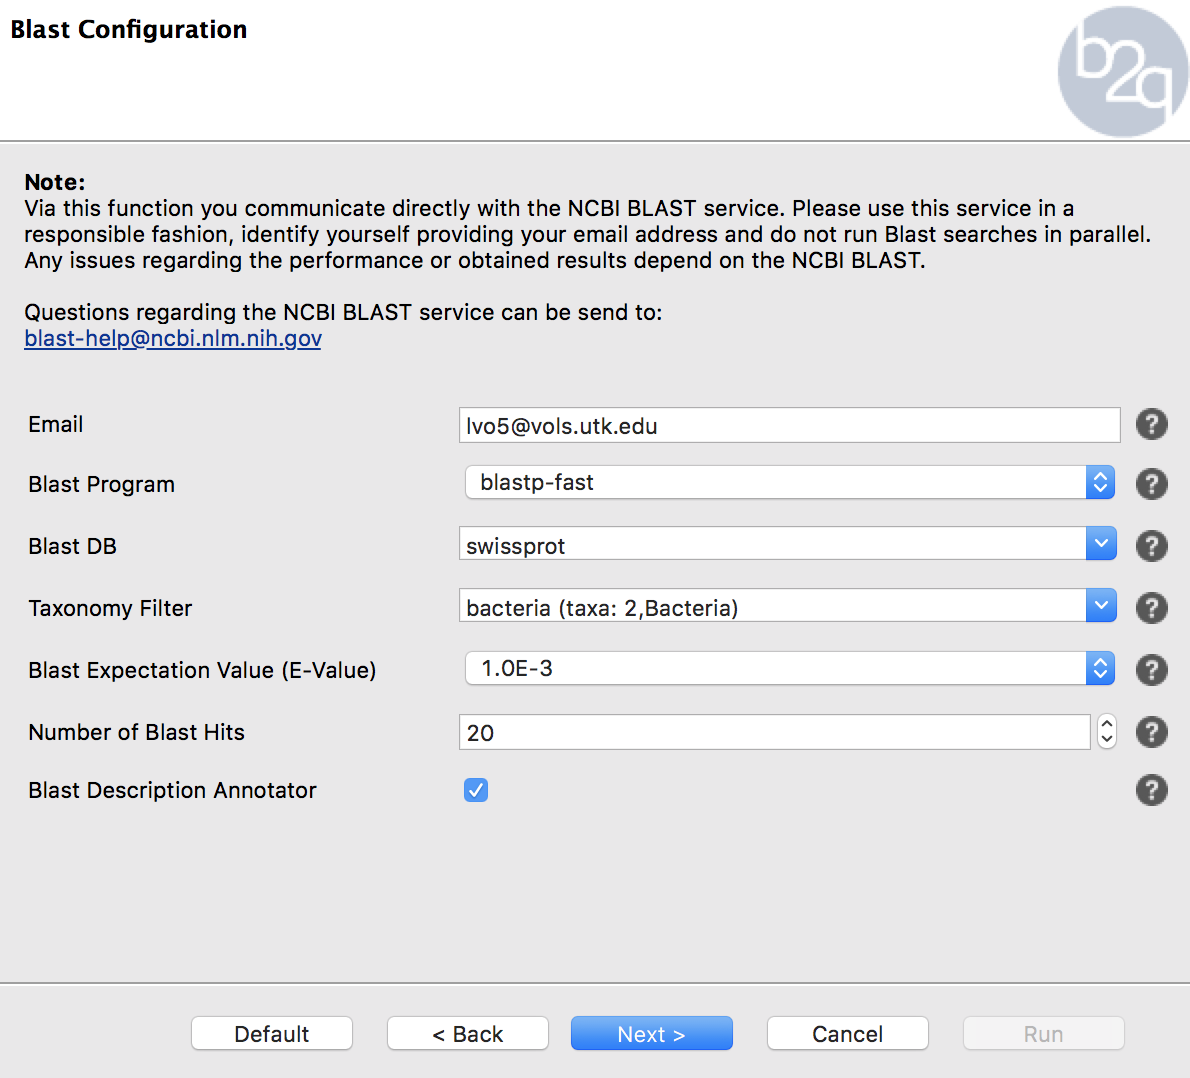

In [25]:
Image("pictures/6.png")

After your BLAST is finished, interpro - mapping - annotation will be run next. These options will only take 15 minutes total. After the workflow is finished, we will have this on your screen. **SAVE THE B2G FILES AFTER THE WORKFLOW IS FINISHED, SO YOU DON'T HAVE TO DO IT AGAIN**. 

After this, you can perform additional analysis on your omnic datasets. 

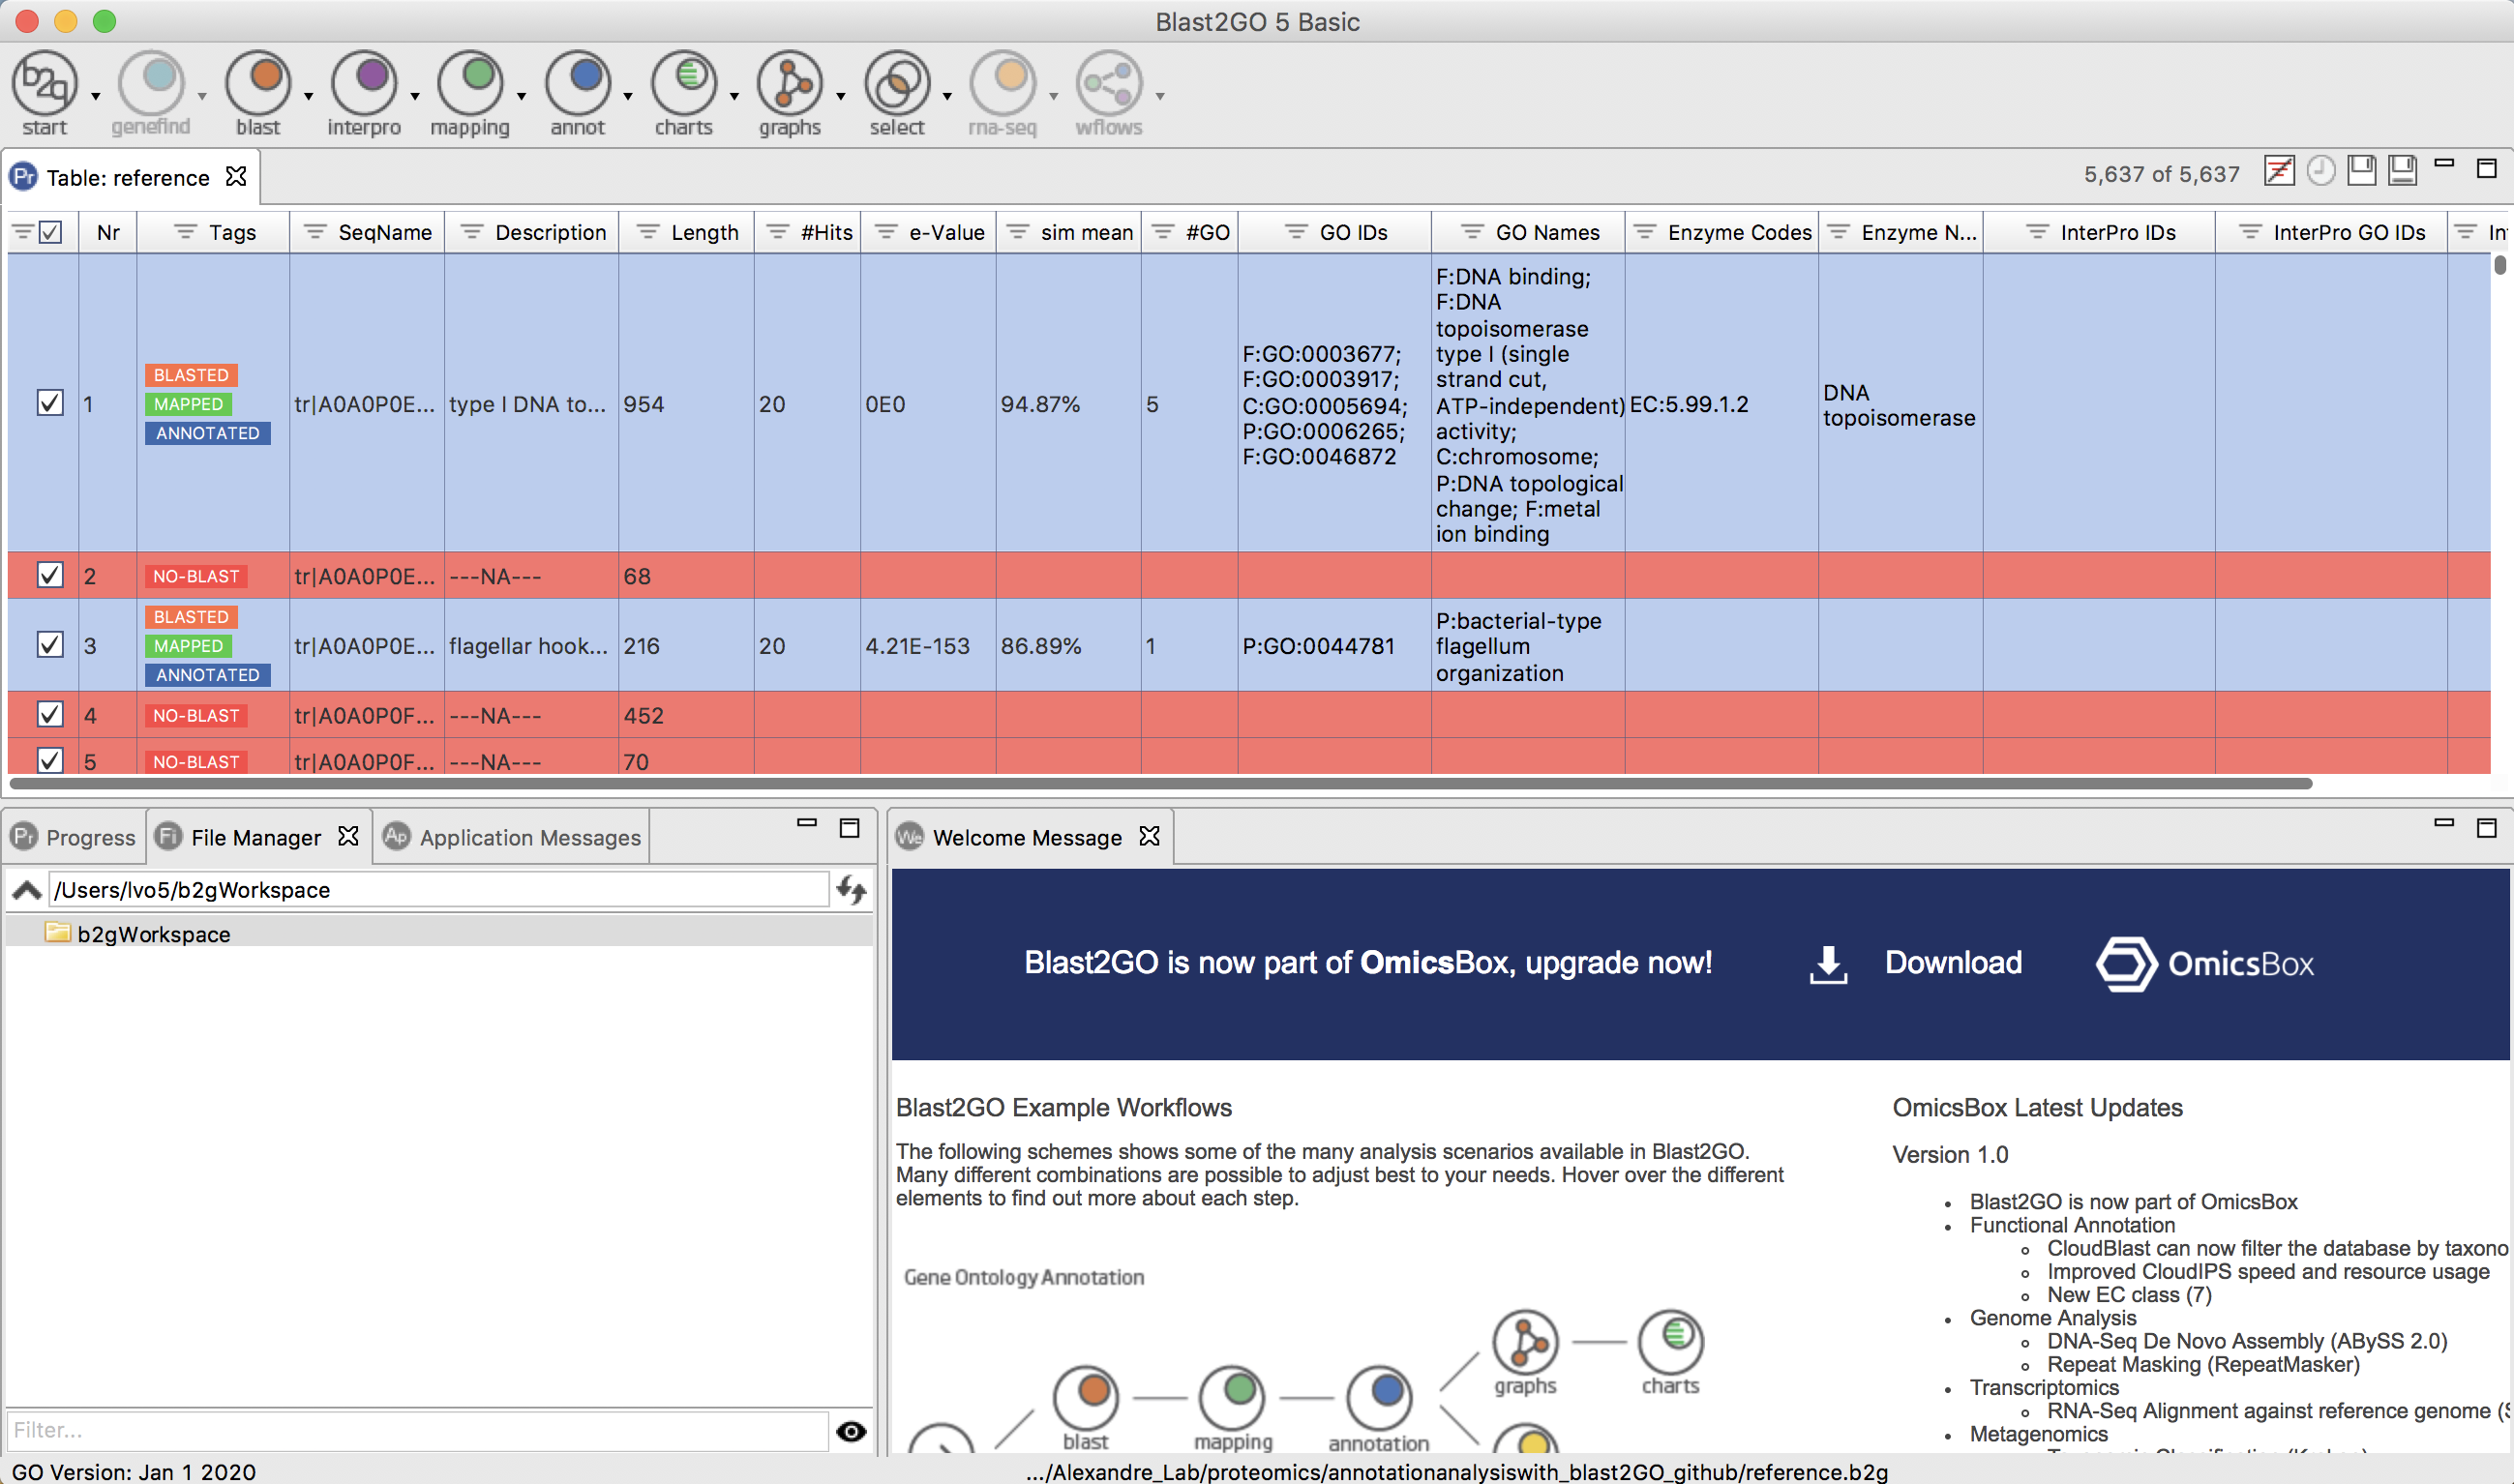

In [26]:
Image("pictures/7.png")

### Step 4: Gene set enrichment analyses (GSEA) of up- and down- regulated proteins in comparison studies

Briefly, GSEA determines what classes or categories of proteins/genes are 'enriched', or over-represented, in the list of up- and down-regulated proteins/genes relative to the whole proteomes/genomes. This analysis is a great tool for the user to determine what pathways or compartments are being up- or down-regulated in a particular experimental conditions relative to your control. 

The GSEA relies on a statistical test called the **Fischer's Exact Test**. To learn more about the method, please refer to: https://en.wikipedia.org/wiki/Fisher%27s_exact_test

First, you need to import your list of proteins/genes that is down- or up- regulated in your experimental conditions. The protein names must be in the following format:
* 

We will use our *cheA4 vs. SP7 (WT)* analysis from Trial 1 as an example. To perform the Fischer's Exact test, select the following option in BLAST2GO. **Make sure that the annotated, complete .b2g file is loaded in BLAST2GO.**

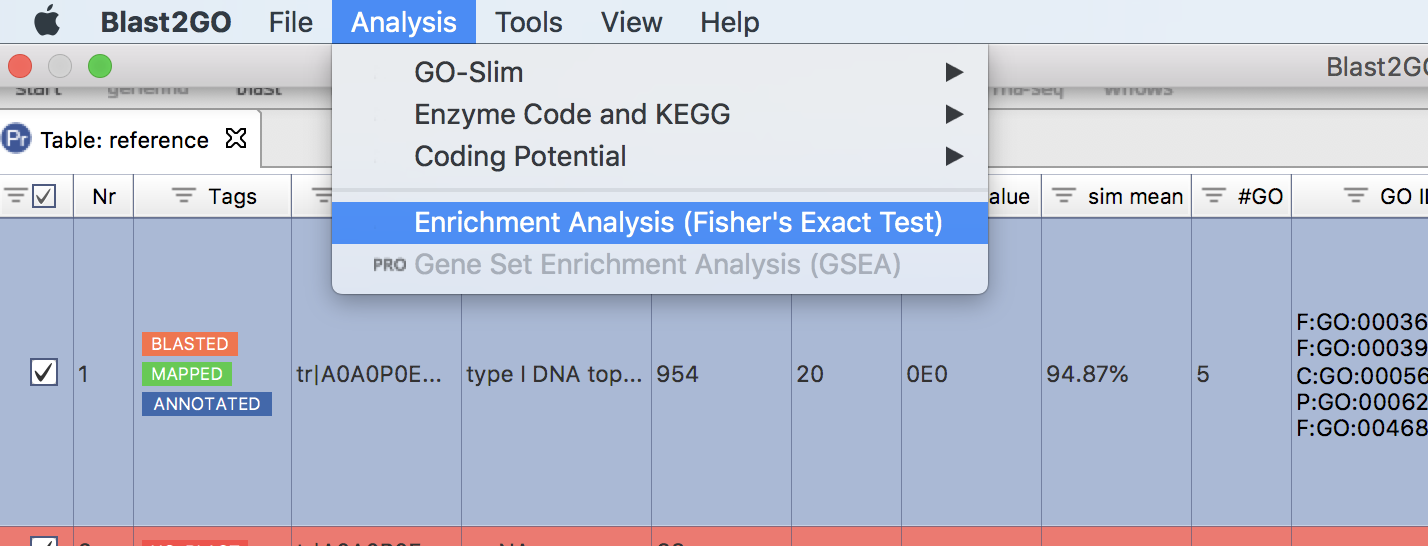

In [30]:
Image("pictures/8.png")

After that, you have to navigate the up- or down-regulated protein list into the **'test-set file'** section and the whole protein list into the **reference-set file**. This test will take about 10-15 minutes each test set.

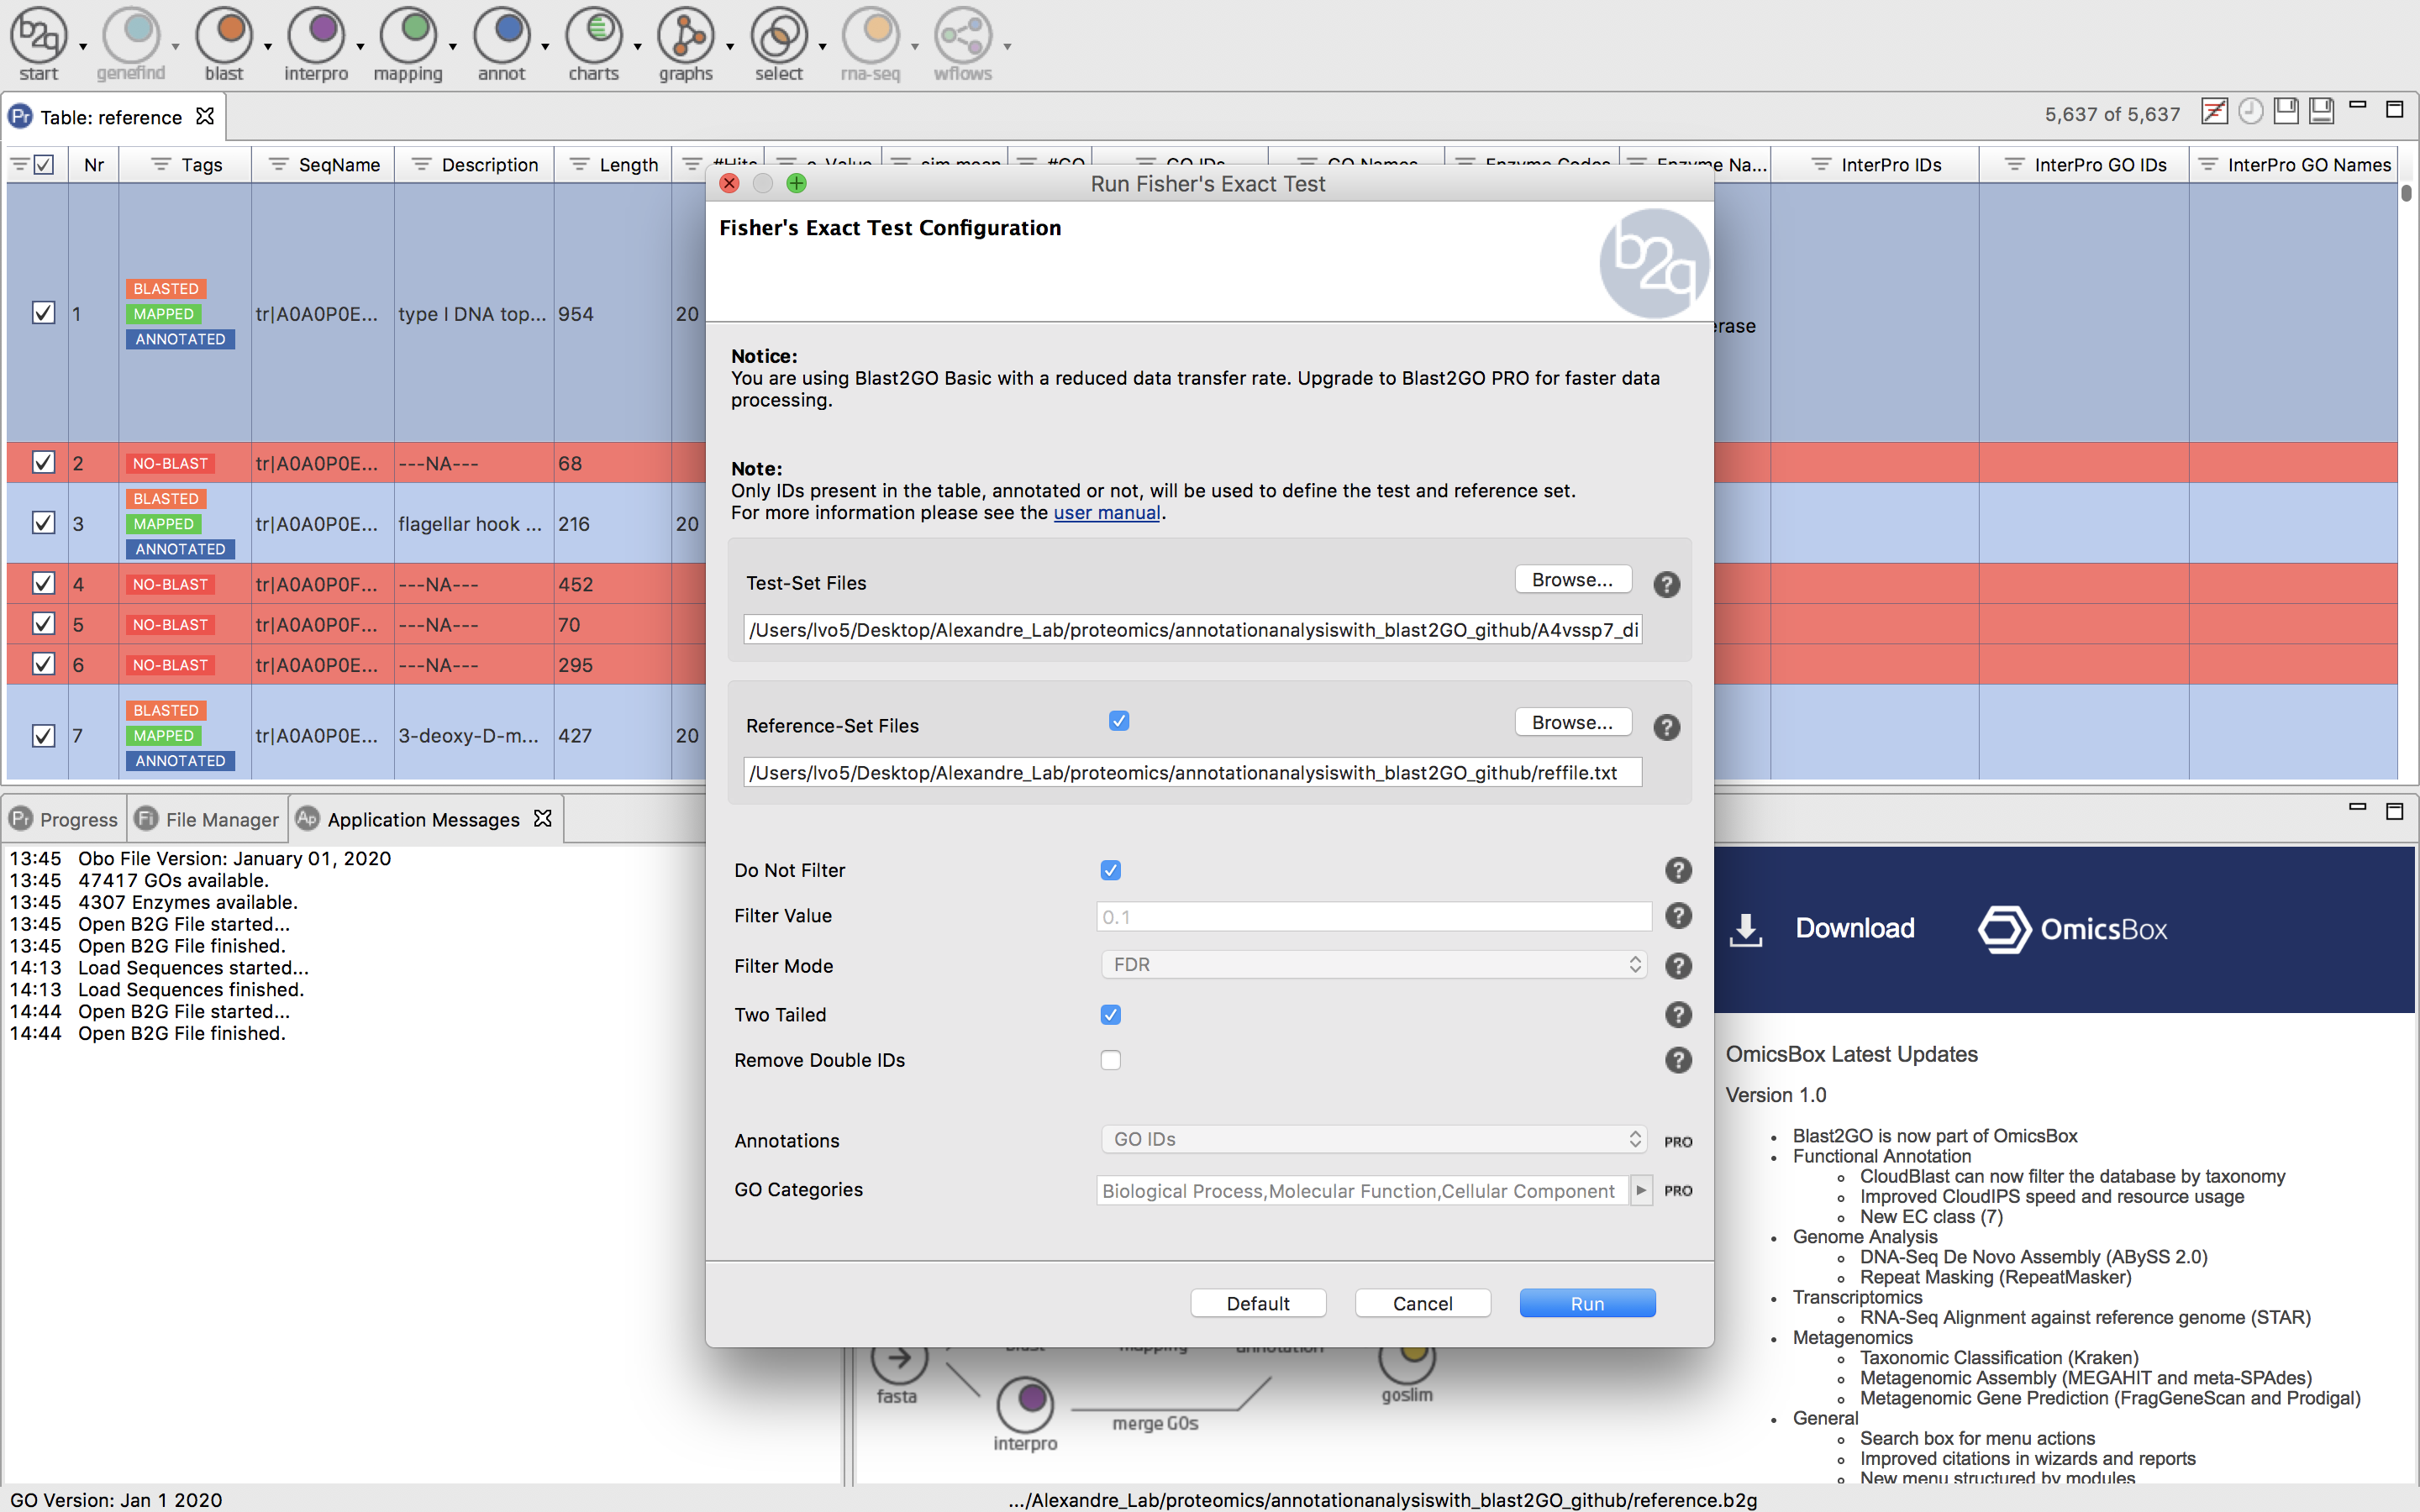

In [33]:
Image("pictures/9.png")

Once the test is finished, you will be given a table **shown below**. Here, it shows the enriched GO terms that are overrepresented in the list of up- and down- regulated proteins. The Fischer's exact test also show what GO terms are under-represented in the list of proteins. You can use the program to visualize the results of this test. However, with the BASIC toolboxes, the graphs will be in low resolutions. 

Export the table as .txt files, and we can visualize the using **Python**.

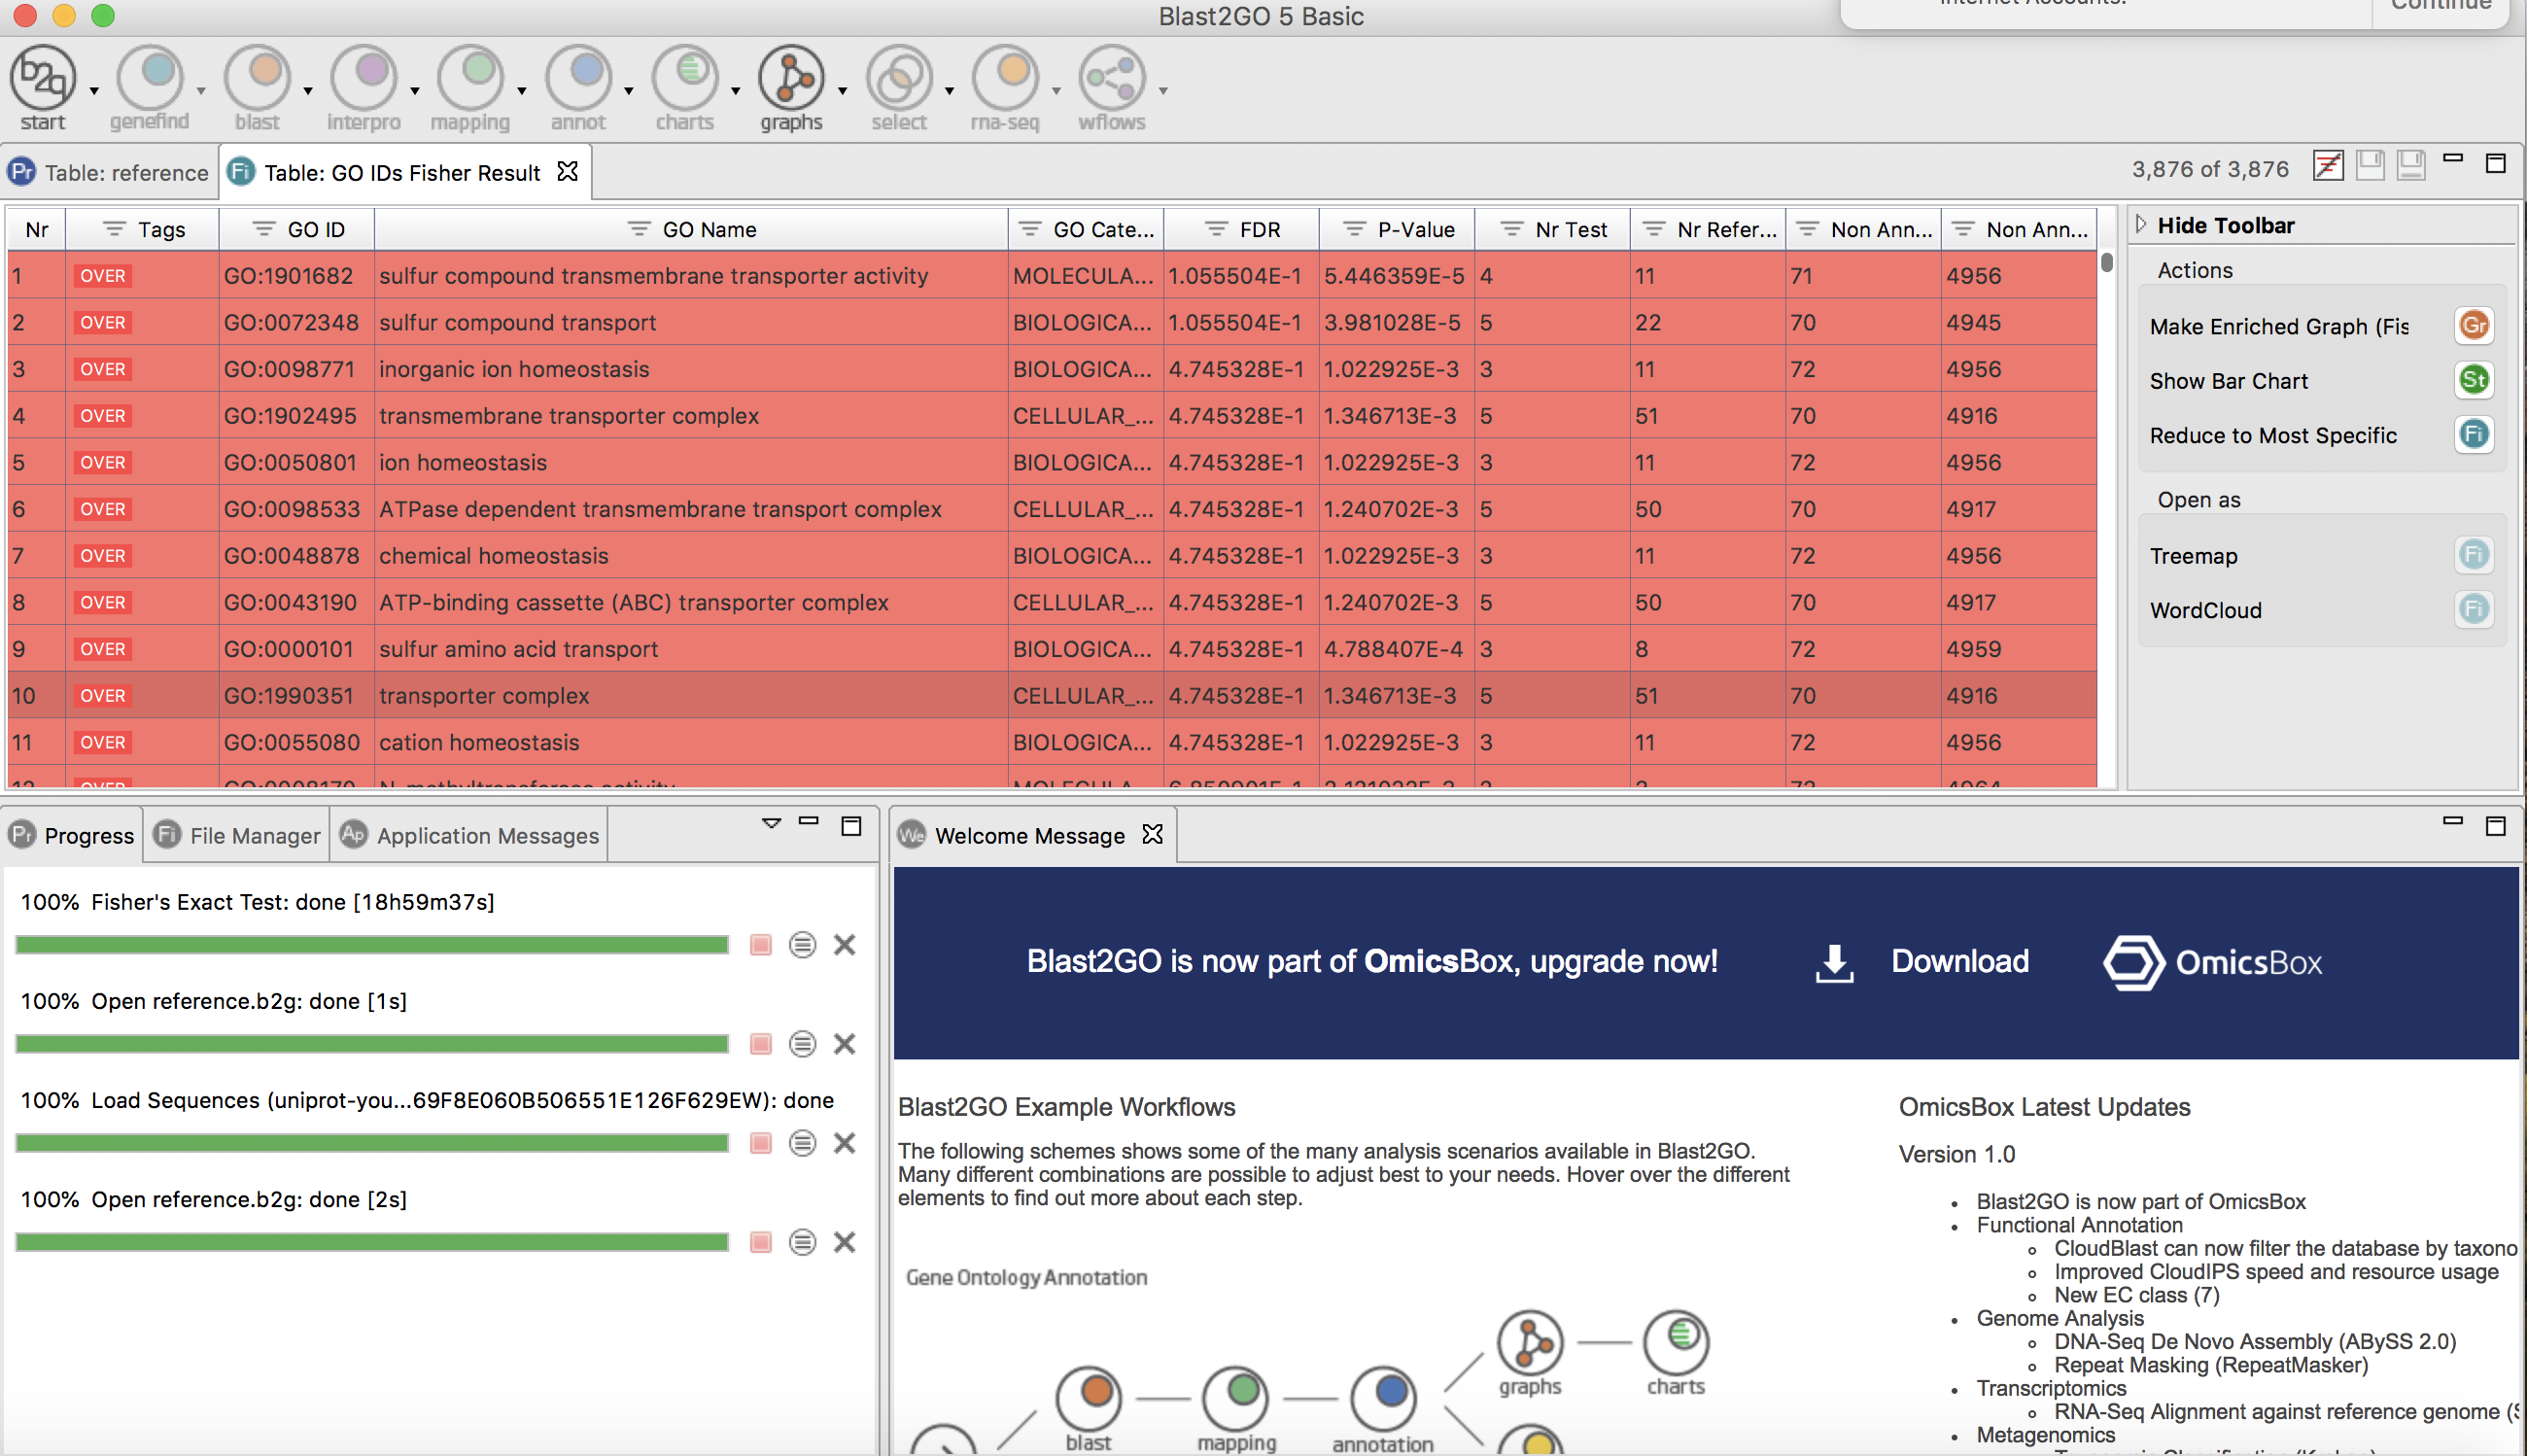

In [34]:
Image("pictures/10.png")

Import the result tables of the Fischer's Exact Test into Python. Then, we want to extract the variables that we want, and we would want to isolated the enriched GO terms that has the p-values less than 0.05 (p < 0.05).

In [35]:
GO_enriched_A4vssp7_up = pd.read_table('GSEA_A4vsSP7DEP_up.txt')
GO_enriched_A4vssp7_down = pd.read_table('GSEA_A4vsSP7DEP_down.txt')

GO_enriched_A4vssp7_up = GO_enriched_A4vssp7_up[GO_enriched_A4vssp7_up['P-Value'] < 0.05][['GO ID', 'GO Name', 'GO Category', 'P-Value']]
GO_enriched_A4vssp7_down = GO_enriched_A4vssp7_down[GO_enriched_A4vssp7_down['P-Value'] < 0.05][['GO ID', 'GO Name', 'GO Category', 'P-Value']]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


Sometimes, there will be more than hundreds of GO-terms that are enriched in the dataset. Because of this, it is often difficult to visualize all of the GO-terms. However, a common approach is to only represent the **top 10-30 GO-terms** that are enriched based on the order of the p-values.

Text(0.5, 0.98, 'CheA4/SP7 Top 30 Biological Process GO enrichment')

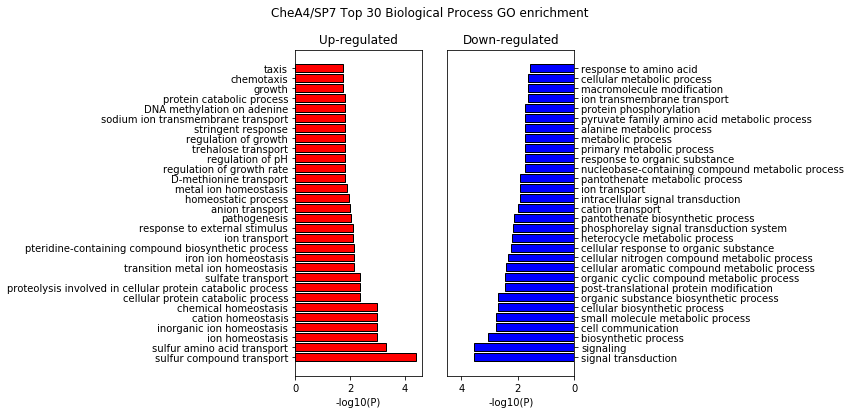

In [36]:
#Plot BP and MF, we could look at Cellular Component - but for our study, it is not applicable
#Here, we want to plot the bar graph of top 30 GO term for BP and M

# A4 vs SP7 up-regulated BP

index_graph = list(range(0,30))

BP_p_up = list(GO_enriched_A4vssp7_up[GO_enriched_A4vssp7_up['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['P-Value'])
BP_id_up =list(GO_enriched_A4vssp7_up[GO_enriched_A4vssp7_up['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['GO Name'])

BP_p_down=list(GO_enriched_A4vssp7_down[GO_enriched_A4vssp7_down['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['P-Value'])
BP_id_down=list(GO_enriched_A4vssp7_down[GO_enriched_A4vssp7_down['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['GO Name'])

import matplotlib.pyplot as plt
import numpy as np

fig, ([ax1, ax2]) = plt.subplots(nrows=1, ncols=2, figsize=(5,6))
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_up[i]))
    
ax1.barh([BP_id_up[i] for i in index_graph], graph_bp_p, color = 'red', align='center', edgecolor='k')
ax1.set_title('Up-regulated')
ax1.set_xlabel('-log10(P)')
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_down[i]))
ax2.barh([BP_id_down[i] for i in index_graph], graph_bp_p, color = 'blue', align='center', edgecolor='k')
ax2.invert_xaxis()
ax2.yaxis.tick_right()
ax2.set_title('Down-regulated')
ax2.set_xlim([4.5, 0])
ax2.set_xlabel('-log10(P)')
fig.suptitle('CheA4/SP7 Top 30 Biological Process GO enrichment')

Text(0.5, 0.98, 'CheA4/SP7 Top 30 Molecular Function GO enrichment')

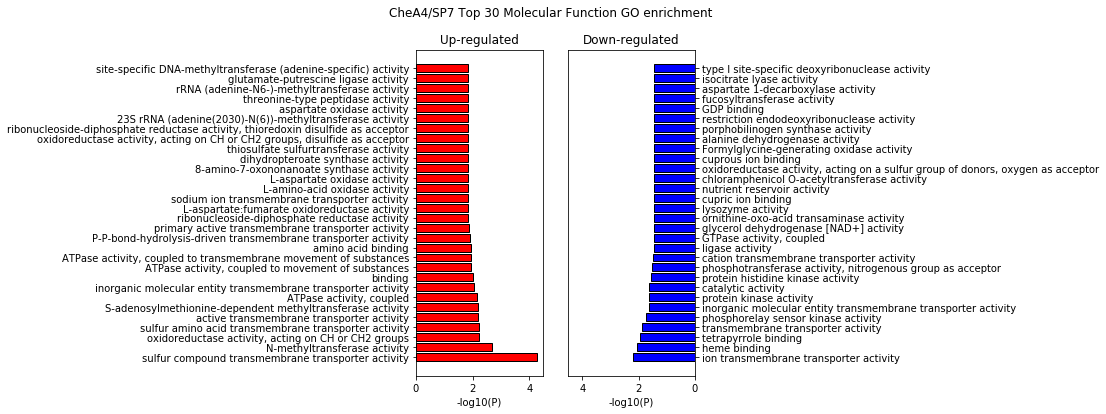

In [37]:
#Molecular function A4/SP7

# A4 vs SP7 up-regulated BP

index_graph = list(range(0,30))

BP_p_up = list(GO_enriched_A4vssp7_up[GO_enriched_A4vssp7_up['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['P-Value'])
BP_id_up =list(GO_enriched_A4vssp7_up[GO_enriched_A4vssp7_up['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['GO Name'])

BP_p_down=list(GO_enriched_A4vssp7_down[GO_enriched_A4vssp7_down['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['P-Value'])
BP_id_down=list(GO_enriched_A4vssp7_down[GO_enriched_A4vssp7_down['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['GO Name'])

import matplotlib.pyplot as plt
import numpy as np

fig, ([ax1, ax2]) = plt.subplots(nrows=1, ncols=2, figsize=(5,6))
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_up[i]))
    
ax1.barh([BP_id_up[i] for i in index_graph], graph_bp_p, color = 'red', align='center', edgecolor='k')
ax1.set_title('Up-regulated')
ax1.set_xlabel('-log10(P)')
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_down[i]))
ax2.barh([BP_id_down[i] for i in index_graph], graph_bp_p, color = 'blue', align='center', edgecolor='k')
ax2.invert_xaxis()
ax2.yaxis.tick_right()
ax2.set_title('Down-regulated')
ax2.set_xlim([4.5, 0])
ax2.set_xlabel('-log10(P)')
fig.suptitle('CheA4/SP7 Top 30 Molecular Function GO enrichment')